In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d

from car import Car
from tools_cv import *
from tools_kinematics import *

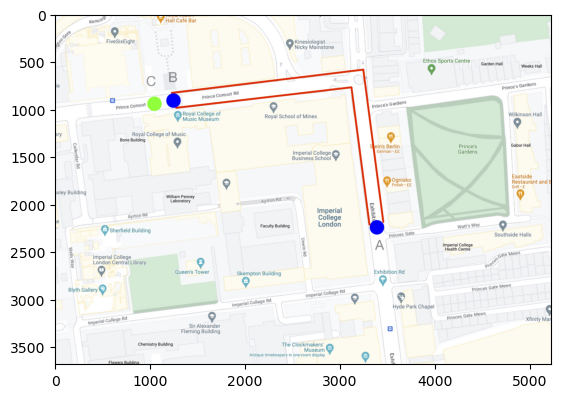

In [3]:
%matplotlib inline
img = cv2.imread('CWMap.jpg')  # BGR
show_img(img)

In [4]:
img_R = extract_color(img, 'R')
img_G = extract_color(img, 'G')
img_B = extract_color(img, 'B')

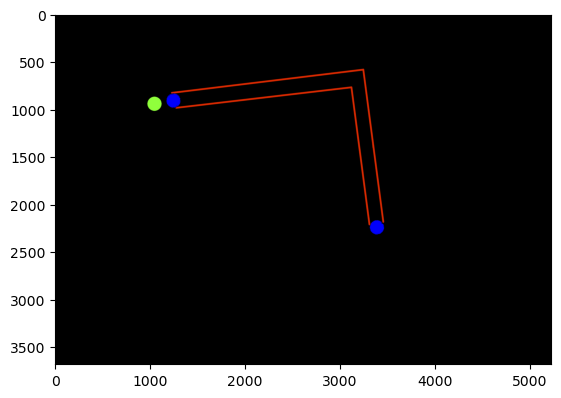

In [5]:
# show_img(img_R)
# show_img(img_G)
# show_img(img_B)
show_img(img_R + img_G + img_B)

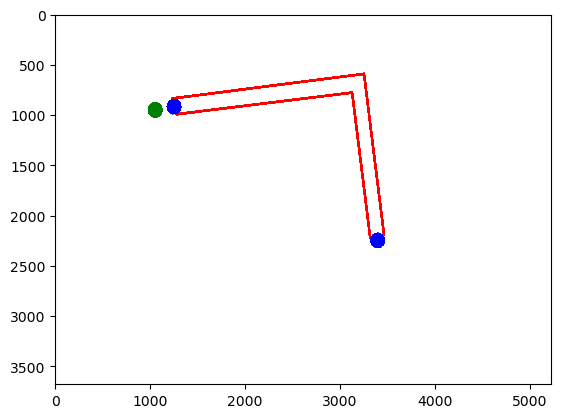

In [6]:
R_coords = mask2xy(img_R)
G_coords = mask2xy(img_G)
B_coords = mask2xy(img_B)

plt.scatter(R_coords[:, 0], R_coords[:, 1], c='r', s=0.1, linewidth=0.1)
plt.scatter(G_coords[:, 0], G_coords[:, 1], c='g', s=0.1, linewidth=0.1)
plt.scatter(B_coords[:, 0], B_coords[:, 1], c='b', s=0.1, linewidth=0.1)
plt.xlim([0, img.shape[1]])
plt.ylim([img.shape[0], 0])
plt.show()

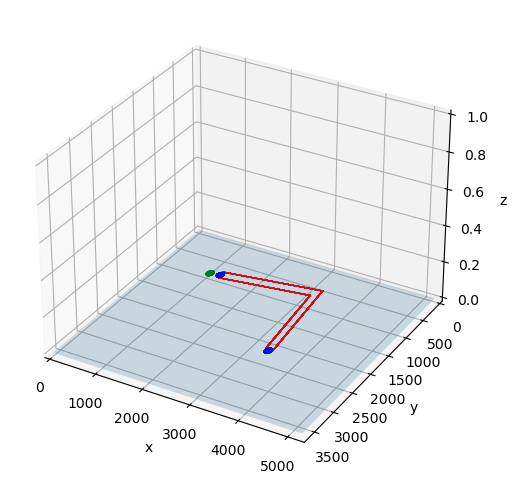

In [8]:

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([0, img.shape[1]])
ax.set_ylim([img.shape[0], 0])
ax.set_zlim([0, 1])

ax.scatter(R_coords[:, 0], R_coords[:, 1], 0, c='r', s=0.1, linewidth=0.1)
ax.scatter(G_coords[:, 0], G_coords[:, 1], 0, c='g', s=0.1, linewidth=0.1)
ax.scatter(B_coords[:, 0], B_coords[:, 1], 0, c='b', s=0.1, linewidth=0.1)

x, y = np.meshgrid(np.linspace(0, img.shape[1], 1000), np.linspace(0, img.shape[0], 1000))
z = np.zeros_like(x)
ax.plot_surface(x, y, z, alpha=0.2)

plt.show()

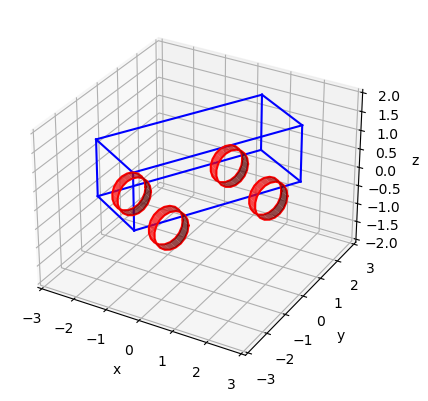

In [2]:
mycar = Car(length=5, width=2, height=1.5,
            wheel_radius=0.5, wheel_width=0.3,
            wheel_offset=0.2, wheel_base=3)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

R = rotation(np.pi/3, 'z')
T = add_translation(R)
mycar.update_plot(ax, T)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-2, 2])

plt.show()